 Install and Import Dependencies
 

In [1]:
!pip3 install torch torchvision torchaudio


   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 2.4/203.0 MB 12.2 MB/s eta 0:00:17
    --------------------------------------- 5.0/203.0 MB 12.6 MB/s eta 0:00:16
   - -------------------------------------- 7.3/203.0 MB 12.2 MB/s eta 0:00:16
   - -------------------------------------- 10.0/203.0 MB 12.2 MB/s eta 0:00:16
   -- ------------------------------------- 12.3/203.0 MB 12.1 MB/s eta 0:00:16
   -- ------------------------------------- 14.9/203.0 MB 12.0 MB/s eta 0:00:16
   --- ------------------------------------ 17.3/203.0 MB 12.1 MB/s eta 0:00:16
   --- ------------------------------------ 19.9/203.0 MB 12.1 MB/s eta 0:00:16
   ---- ----------------------------------- 22.3/203.0 MB 12.0 MB/s eta 0:00:16
   ---- ----------------------------------- 24.9/203.0 MB 12.1 MB/s eta 0:00:15
   ----- ---------------------------------- 27.3/203.0 MB 12.1 MB/s eta 0:00:15
   ----- ---------------------------------- 29.6/203

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!cd yolov5 & pip install -r requirements.txt

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------- -------------------------- 2.6/8.0 MB 12.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 11.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   -- ------------------------------------- 2.6/38.8 MB 13.7 MB/s eta 0:00:03
   ----- ---------------------------------- 5.2/38.8 MB 12.7 MB/s eta 0:00:03
   ------- -------------------------------- 7.6/38.8 MB 12.7 MB/s eta 0:00:03
   ---------- ----------------------------- 10.2/38.8 MB 12.5 MB/s eta 0:00:03
   ------------ --------------------------- 12.6/38.8 MB 12.3 MB/s eta 0:00:03
   --------------- ------------------------ 14.7/38.8 MB 12.3 MB/s eta 0:00:02
   ----------------- ---------------------- 17.3/38.8 MB 12.0 MB/s eta 0:00:02
   

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

 Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ADMIN/.cache\torch\hub\master.zip


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\ADMIN\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5  2025-1-1 Python-3.12.1 torch-2.5.1+cpu CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 11.3MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Real Time Detections

In [8]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models

Train from scratch

In [7]:
import uuid   # Unique identifier
import os
import time

In [14]:
# Define the path to the 'images' folder
IMAGES_PATH = os.path.join('data', 'images')  # This will point to /data/images (relative to current working directory)

# Create the directory if it doesn't exist
os.makedirs(IMAGES_PATH, exist_ok=True)

# Labels and number of images
labels = ['Peter Parker', 'Hand Raising', 'Using phone']
number_imgs = 15

print(f"Data directory structure is ready at: {IMAGES_PATH}")


Data directory structure is ready at: data\images


In [15]:
cap = cv2.VideoCapture(1)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\Peter Parker.0c803aa1-c842-11ef-8e8c-3448ed15d5a0.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\Peter Parker.0d9cfa87-c842-11ef-a327-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa88-c842-11ef-ade0-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa89-c842-11ef-aba3-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa8a-c842-11ef-9d53-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa8b-c842-11ef-aaa9-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa8c-c842-11ef-99c5-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa8d-c842-11ef-adb2-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa8e-c842-11ef-be17-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa8f-c842-11ef-8dcb-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa90-c842-11ef-b50c-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa91-c842-11ef-a46e-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa92-c842-11ef-a42a-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa93-c842-11ef-baad-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa94-c842-11ef-964e-3448ed15d5a0.jpg
data\images\Peter Parker.0d9cfa95-c842-11ef-97a6-3448ed15d5a0.jpg
data\image

In [18]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [19]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ------------- -------------------------- 2.4/6.9 MB 13.4 MB/s eta 0:00:01
   ----------------------------- ---------- 5.0/6.9 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   --------------------------- ------------ 2.6/3.8 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/50.1 MB ? eta -:--:--
   -- ------------------------------------- 2.9/50.1 MB 9.9 MB/s eta 0:00:05
   ---- ----------------------------------- 5.2/50.1 MB 11.0 MB/s eta 0:00:05
   ------ --------------------------------- 7.9/50.1 MB 11.6 MB/s eta 0:00:04
   -------- ------------------------------- 10.2/50.1 MB 11.4 MB/s eta 0:00:04
   ---------- -----------

In [37]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-390-g0797106a Python-3.12.1 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2,

 Load Custom Model

In [55]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ADMIN/.cache\torch\hub\master.zip
YOLOv5  2025-1-1 Python-3.12.1 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [56]:
img = os.path.join('data', 'images', 'Peter Parker.d04382fb-c841-11ef-9f1d-3448ed15d5a0.jpg')

In [57]:
results = model(img)

C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [58]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 6.1ms pre-process, 142.6ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


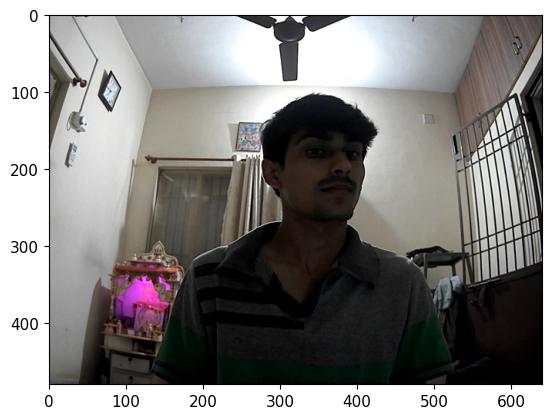

In [54]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master\models